In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the file path
#data_path = "./data/First_Impressions_v3_multimodal/"
data_path = "./"
train_path = data_path+"train_set_age_labels.csv"
valid_path = data_path+"valid_set_age_labels.csv"
test_path = data_path+"test_set_age_labels.csv"

# Read the CSV file into a DataFrame
train = pd.read_csv(train_path)
valid = pd.read_csv(valid_path)
test = pd.read_csv(test_path)

# Display the DataFrame (optional)
display(train)

,VideoName,UserID,AgeGroup,Gender,Ethnicity
0,YFm-8VGsUGg.004.mp4,YFm-8VGsUGg,1,2,2
1,-2qsCrkXdWs.001.mp4,-2qsCrkXdWs,1,1,2
2,rW7b48Dy_80.000.mp4,rW7b48Dy_80,1,2,2
3,1zpucNpIDk8.000.mp4,1zpucNpIDk8,1,2,3
4,2KSBoJZMcMU.000.mp4,2KSBoJZMcMU,1,1,2
...,...,...,...,...,...
6001,f9GeYKAXgAQ.002.mp4,f9GeYKAXgAQ,7,2,2
6002,f9GeYKAXgAQ.003.mp4,f9GeYKAXgAQ,7,2,2
6003,f9GeYKAXgAQ.005.mp4,f9GeYKAXgAQ,7,2,2
6004,f9GeYKAXgAQ.004.mp4,f9GeYKAXgAQ,7,2,2


In [3]:
# Define dictionaries for mappings
age_mapping = {
    1: '[07,13]',
    2: '[14,18]',
    3: '[19,24]',
    4: '[25,32]',
    5: '[33,45]',
    6: '[46,60]',
    7: '[61,+]'
}

gender_mapping = {
    1: 'Male',
    2: 'Female'
}

ethnicity_mapping = {
    1: 'Asian',
    2: 'Caucasian',
    3: 'African-American'
}

def apply_mapping(df, age_mapping, gender_mapping, ethnicity_mapping):
    # Apply mappings to DataFrame
    df['AgeGroup'] = df['AgeGroup'].map(age_mapping)
    df['Gender'] = df['Gender'].map(gender_mapping)
    df['Ethnicity'] = df['Ethnicity'].map(ethnicity_mapping)
    return df

train = apply_mapping(train, age_mapping, gender_mapping, ethnicity_mapping)
valid = apply_mapping(valid, age_mapping, gender_mapping, ethnicity_mapping)
test = apply_mapping(test, age_mapping, gender_mapping, ethnicity_mapping)

# Display DataFrame with mappings applied
display(train)

,VideoName,UserID,AgeGroup,Gender,Ethnicity
0,YFm-8VGsUGg.004.mp4,YFm-8VGsUGg,"[07,13]",Female,Caucasian
1,-2qsCrkXdWs.001.mp4,-2qsCrkXdWs,"[07,13]",Male,Caucasian
2,rW7b48Dy_80.000.mp4,rW7b48Dy_80,"[07,13]",Female,Caucasian
3,1zpucNpIDk8.000.mp4,1zpucNpIDk8,"[07,13]",Female,African-American
4,2KSBoJZMcMU.000.mp4,2KSBoJZMcMU,"[07,13]",Male,Caucasian
...,...,...,...,...,...
6001,f9GeYKAXgAQ.002.mp4,f9GeYKAXgAQ,"[61,+]",Female,Caucasian
6002,f9GeYKAXgAQ.003.mp4,f9GeYKAXgAQ,"[61,+]",Female,Caucasian
6003,f9GeYKAXgAQ.005.mp4,f9GeYKAXgAQ,"[61,+]",Female,Caucasian
6004,f9GeYKAXgAQ.004.mp4,f9GeYKAXgAQ,"[61,+]",Female,Caucasian


In [4]:
def distribution_charts(df):

    # Create a figure with two subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Count the occurrences of each Age Group
    age_counts = df['AgeGroup'].value_counts()
    age_counts_sorted = age_counts.sort_index()

    # Create a bar plot for Age Group
    ax1.bar(age_counts_sorted.index, age_counts_sorted.values, color='skyblue', edgecolor='black', zorder=3)
    ax1.set_xlabel('Age Group')
    ax1.set_ylabel('Count')
    ax1.set_title('Distribution of Age Groups')

    # Add count values on top of each bar in Age Group plot
    for i, count in enumerate(age_counts_sorted.values):
        ax1.text(i, count + 0.1, str(count), ha='center', va='bottom')

    ax1.grid(color = 'lightgray', linestyle = '--', linewidth = 0.5, zorder=0)

    # Count the occurrences of each Gender
    gender_counts = df['Gender'].value_counts()

    # Create a bar plot for Gender
    ax2.bar(gender_counts.index, gender_counts.values, color='salmon', edgecolor='black', zorder=3)
    ax2.set_xlabel('Gender')
    ax2.set_ylabel('Count')
    ax2.set_title('Distribution of Gender')

    # Add count values on top of each bar in Gender Group plot
    for i, count in enumerate(gender_counts.values):
        ax2.text(i, count + 0.1, str(count), ha='center', va='bottom')

    ax2.grid(color = 'lightgray', linestyle = '--', linewidth = 0.5, zorder=0)

    # Count the occurrences of each Ethnicity
    ethnicity_counts = df['Ethnicity'].value_counts()

    # Create a bar plot for Ethnicity
    ax3.bar(ethnicity_counts.index, ethnicity_counts.values, color='lightgreen', edgecolor='black', zorder=3)
    ax3.set_xlabel('Ethnicity')
    ax3.set_ylabel('Count')
    ax3.set_title('Distribution of Ethnicity')

    # Add count values on top of each bar in Gender Group plot
    for i, count in enumerate(ethnicity_counts.values):
        ax3.text(i, count + 0.1, str(count), ha='center', va='bottom')

    # Add horizontal grid lines to Ethnicity plot
    ax3.grid(color = 'lightgray', linestyle = '--', linewidth = 0.5, zorder=0)

    # Show the plots
    plt.show()

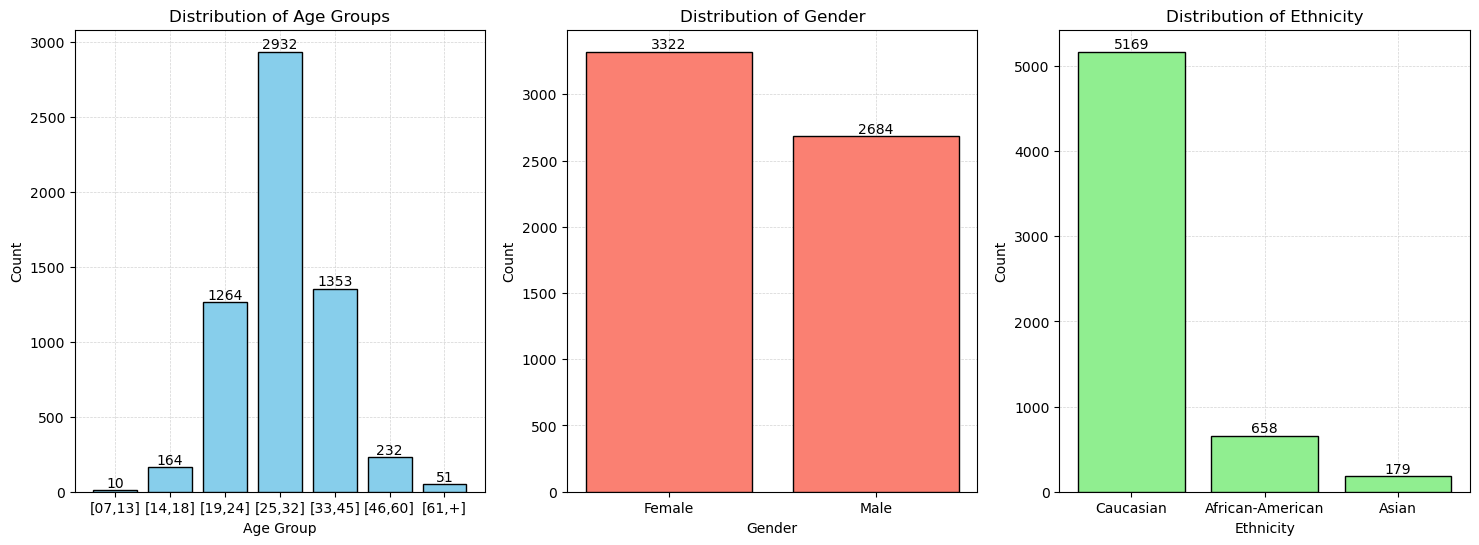

In [44]:
distribution_charts(train)

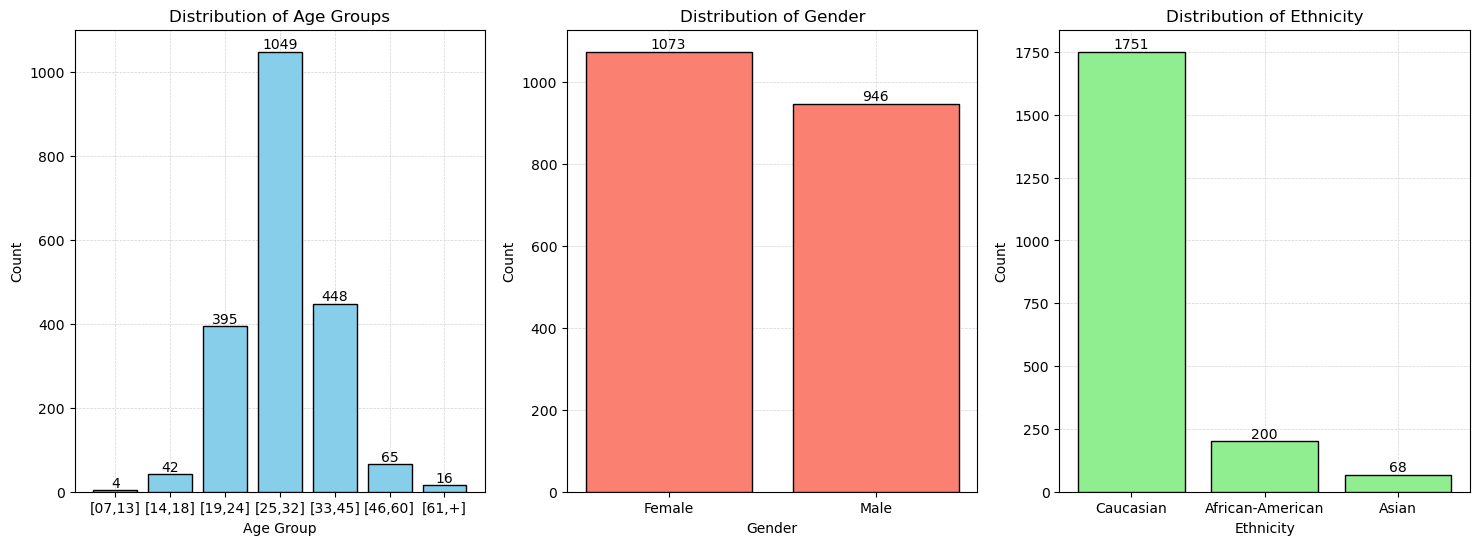

In [45]:
distribution_charts(valid)

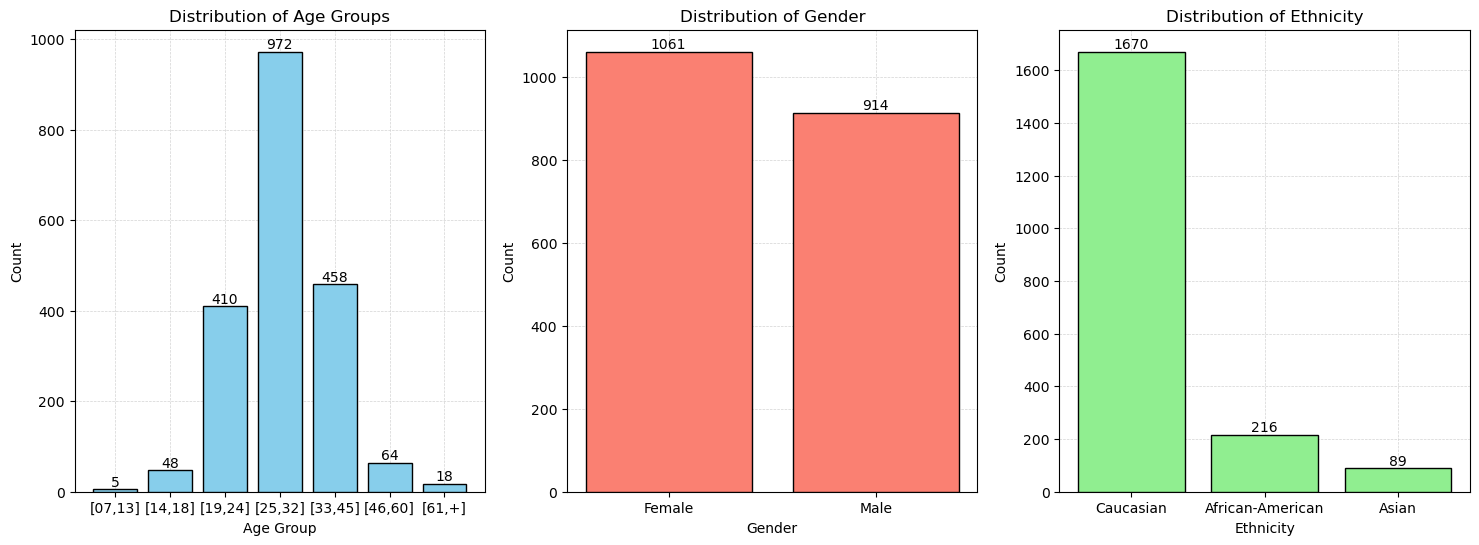

In [46]:
distribution_charts(test)

In [5]:
df= train

<Figure size 1000x600 with 0 Axes>

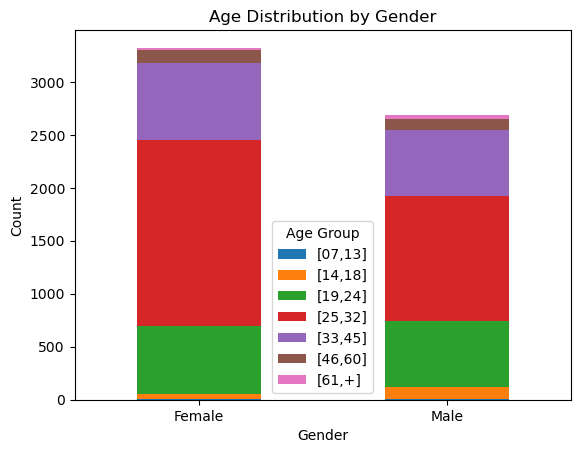

In [65]:
# Plotting age distribution for each gender category
plt.figure(figsize=(10, 6))

# Grouping by Gender and AgeGroup and counting occurrences
age_distribution = df.groupby(['Gender', 'AgeGroup']).size().unstack()

# Plotting
age_distribution.plot(kind='bar', stacked=True)

plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.legend(title='Age Group')

plt.show()

<Figure size 1000x600 with 0 Axes>

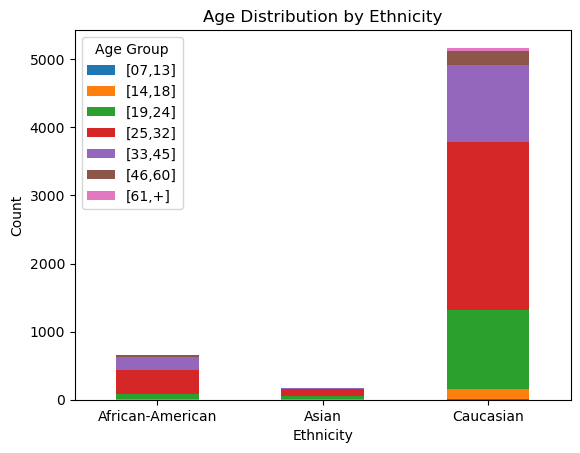

In [72]:
# Plotting age distribution for each ethnicity category
plt.figure(figsize=(10, 6))

# Grouping by Ethnicity and AgeGroup and counting occurrences
age_distribution = df.groupby(['Ethnicity', 'AgeGroup']).size().unstack()

# Plotting
age_distribution.plot(kind='bar', stacked=True)

plt.title('Age Distribution by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Age Group')

plt.show()


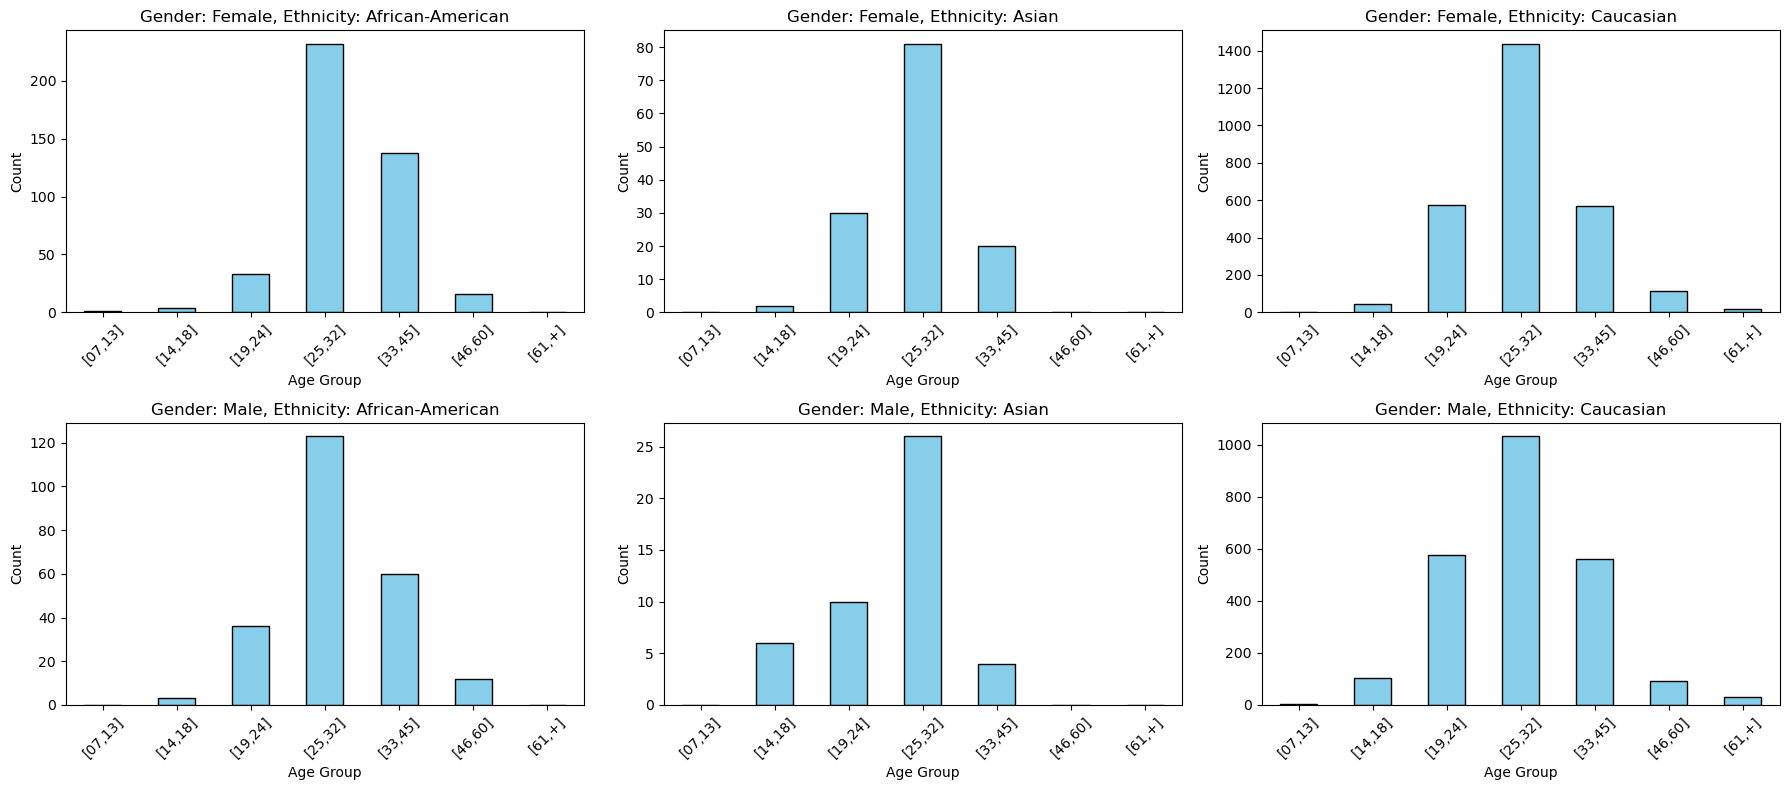

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named df
# If not, you can load it from a CSV file using pd.read_csv('your_file.csv')

df = train

# Group by Gender, Ethnicity, and AgeGroup and count occurrences
age_distribution = df.groupby(['Gender', 'Ethnicity', 'AgeGroup']).size().unstack(fill_value=0)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))

for (gender, ethnicity), ax in zip(age_distribution.index, axes.flat):
    age_distribution.loc[gender, ethnicity].plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Gender: {gender}, Ethnicity: {ethnicity}')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Count')
    ax.set_xticklabels(age_distribution.columns, rotation=45)

plt.tight_layout()
plt.show()


C:\Users\cagui\AppData\Local\Temp\ipykernel_17820\2145947653.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(age_distribution.columns, rotation=45)


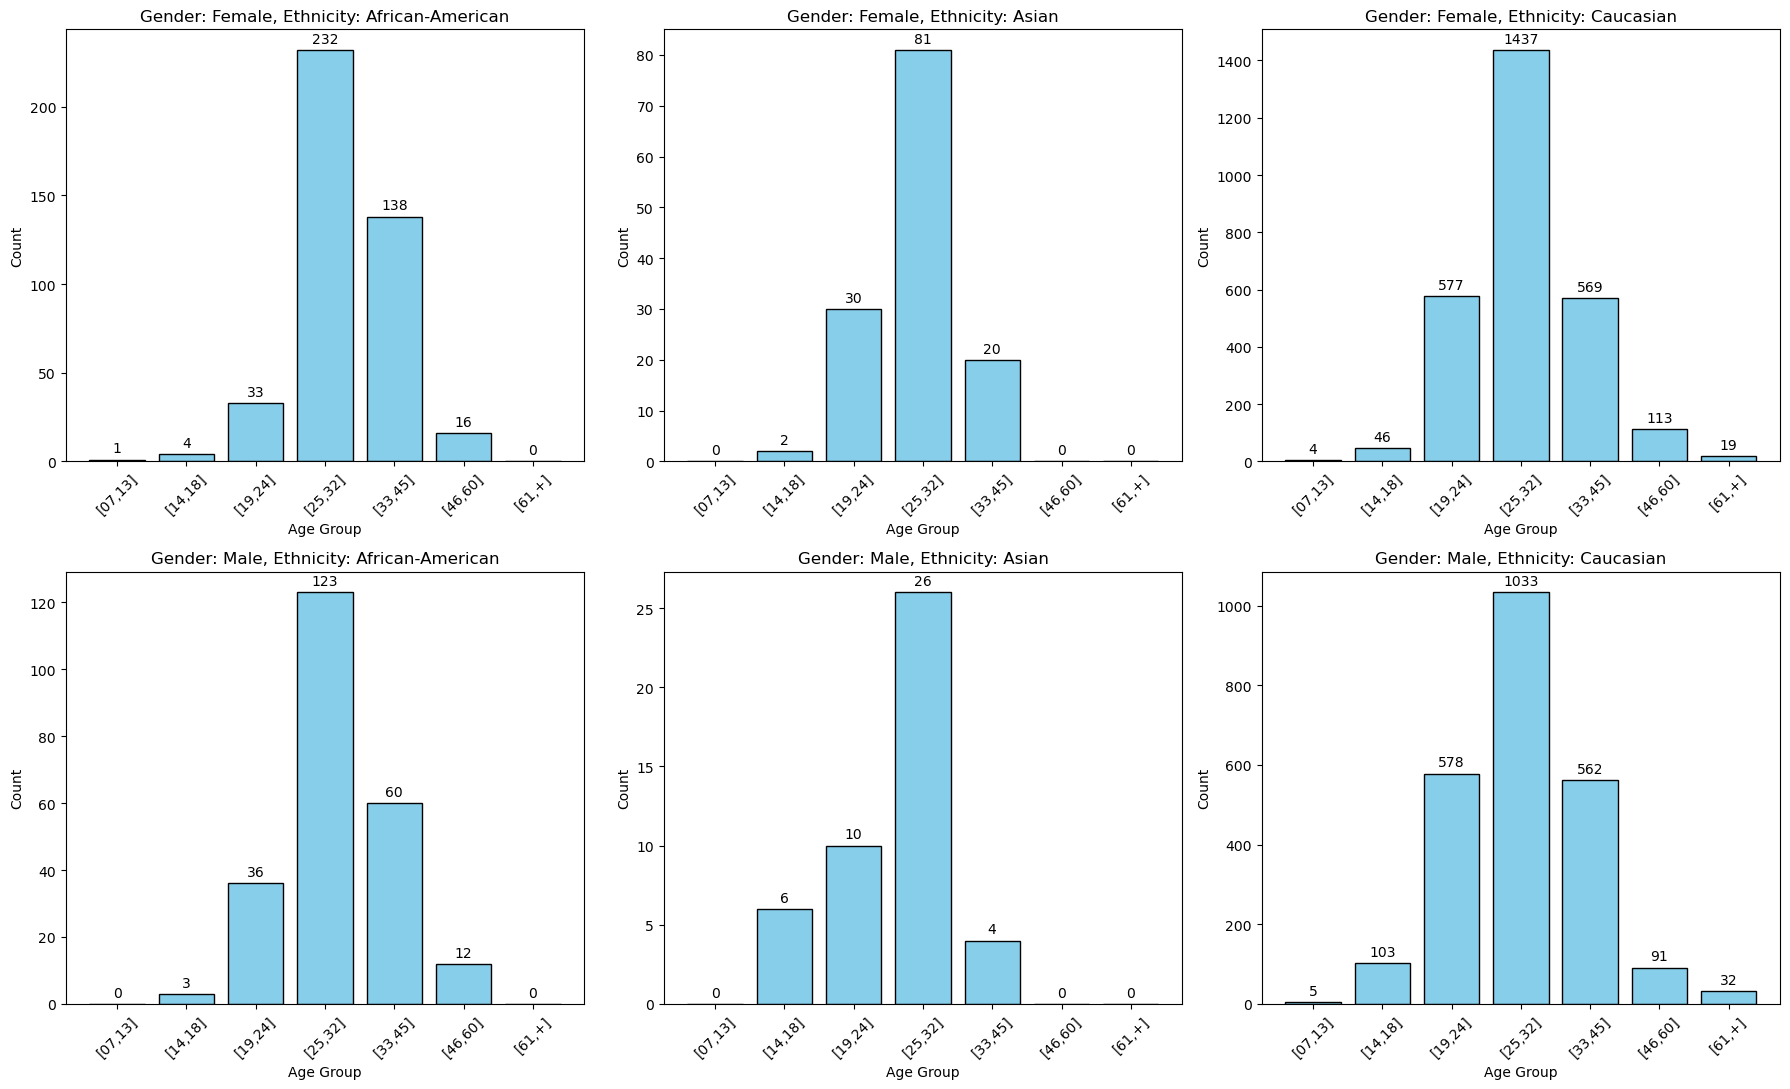

In [8]:
# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 11))

for (gender, ethnicity), ax in zip(age_distribution.index, axes.flat):
    counts = age_distribution.loc[gender, ethnicity]
    bars = ax.bar(counts.index, counts, color='skyblue', edgecolor='black')
    ax.set_title(f'Gender: {gender}, Ethnicity: {ethnicity}')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Count')
    ax.set_xticklabels(age_distribution.columns, rotation=45)
    
    # Add count labels
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [9]:
df=test

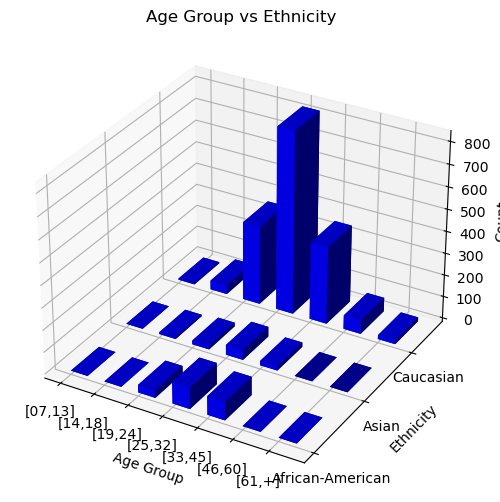

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Count occurrences of each age group and ethnicity combination
age_ethnicity_count = df.groupby(['AgeGroup', 'Ethnicity']).size().unstack(fill_value=0)

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

xpos, ypos = np.meshgrid(range(len(age_ethnicity_count.index)), range(len(age_ethnicity_count.columns)), indexing="ij")

xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5
dz = age_ethnicity_count.values.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

# Setting labels and title
ax.set_xticks(range(len(age_ethnicity_count.index)))
ax.set_xticklabels(age_ethnicity_count.index)
ax.set_xlabel('Age Group')

ax.set_yticks(range(len(age_ethnicity_count.columns)))
ax.set_yticklabels(age_ethnicity_count.columns)
ax.set_ylabel('Ethnicity')

ax.set_zlabel('Count')
ax.set_title('Age Group vs Ethnicity')

plt.show()


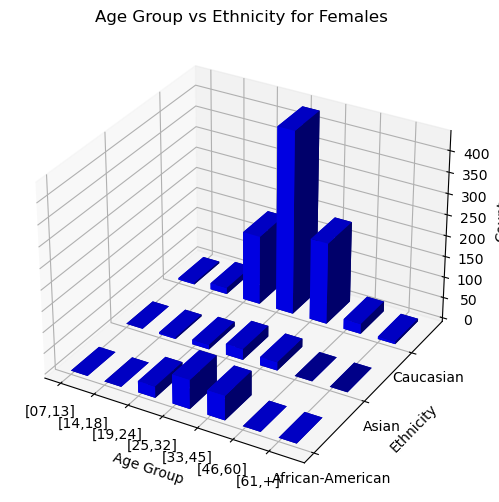

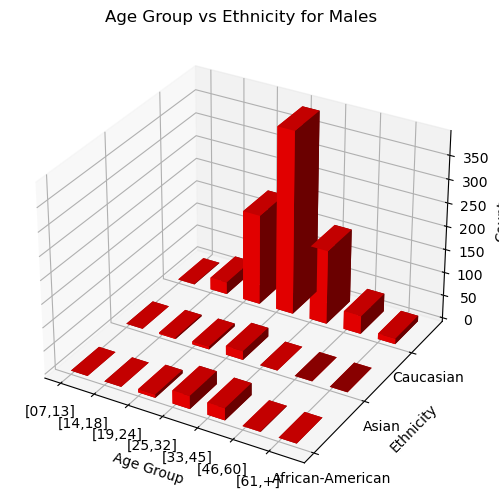

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Count occurrences of each age group and ethnicity combination for females
female_data = df[df['Gender'] == 'Female']
female_age_ethnicity_count = female_data.groupby(['AgeGroup', 'Ethnicity']).size().unstack(fill_value=0)

# Count occurrences of each age group and ethnicity combination for males
male_data = df[df['Gender'] == 'Male']
male_age_ethnicity_count = male_data.groupby(['AgeGroup', 'Ethnicity']).size().unstack(fill_value=0)

# Plotting for females
fig_female = plt.figure(figsize=(10, 6))
ax_female = fig_female.add_subplot(111, projection='3d')

xpos_female, ypos_female = np.meshgrid(range(len(female_age_ethnicity_count.index)), range(len(female_age_ethnicity_count.columns)), indexing="ij")

xpos_female = xpos_female.ravel()
ypos_female = ypos_female.ravel()
zpos_female = 0

dx_female = dy_female = 0.5
dz_female = female_age_ethnicity_count.values.ravel()

ax_female.bar3d(xpos_female, ypos_female, zpos_female, dx_female, dy_female, dz_female, color='b', zsort='average')

# Setting labels and title for females
ax_female.set_xticks(range(len(female_age_ethnicity_count.index)))
ax_female.set_xticklabels(female_age_ethnicity_count.index)
ax_female.set_xlabel('Age Group')

ax_female.set_yticks(range(len(female_age_ethnicity_count.columns)))
ax_female.set_yticklabels(female_age_ethnicity_count.columns)
ax_female.set_ylabel('Ethnicity')

ax_female.set_zlabel('Count')
ax_female.set_title('Age Group vs Ethnicity for Females')

plt.show()

# Plotting for males
fig_male = plt.figure(figsize=(10, 6))
ax_male = fig_male.add_subplot(111, projection='3d')

xpos_male, ypos_male = np.meshgrid(range(len(male_age_ethnicity_count.index)), range(len(male_age_ethnicity_count.columns)), indexing="ij")

xpos_male = xpos_male.ravel()
ypos_male = ypos_male.ravel()
zpos_male = 0

dx_male = dy_male = 0.5
dz_male = male_age_ethnicity_count.values.ravel()

ax_male.bar3d(xpos_male, ypos_male, zpos_male, dx_male, dy_male, dz_male, color='r', zsort='average')

# Setting labels and title for males
ax_male.set_xticks(range(len(male_age_ethnicity_count.index)))
ax_male.set_xticklabels(male_age_ethnicity_count.index)
ax_male.set_xlabel('Age Group')

ax_male.set_yticks(range(len(male_age_ethnicity_count.columns)))
ax_male.set_yticklabels(male_age_ethnicity_count.columns)
ax_male.set_ylabel('Ethnicity')

ax_male.set_zlabel('Count')
ax_male.set_title('Age Group vs Ethnicity for Males')

plt.show()


In [7]:
female_age_ethnicity_count

Ethnicity,African-American,Asian,Caucasian
AgeGroup,,,
"[07,13]",1,0,4
"[14,18]",4,2,46
"[19,24]",33,30,577
"[25,32]",232,81,1437
"[33,45]",138,20,569
"[46,60]",16,0,113
"[61,+]",0,0,19


In [8]:
male_age_ethnicity_count

Ethnicity,African-American,Asian,Caucasian
AgeGroup,,,
"[07,13]",0,0,5
"[14,18]",3,6,103
"[19,24]",36,10,578
"[25,32]",123,26,1033
"[33,45]",60,4,562
"[46,60]",12,0,91
"[61,+]",0,0,32


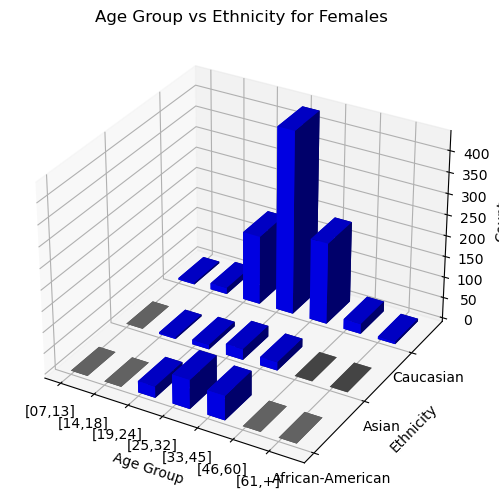

In [12]:
# Plotting for females
fig_female = plt.figure(figsize=(10, 6))
ax_female = fig_female.add_subplot(111, projection='3d')

xpos_female, ypos_female = np.meshgrid(range(len(female_age_ethnicity_count.index)), range(len(female_age_ethnicity_count.columns)), indexing="ij")

xpos_female = xpos_female.ravel()
ypos_female = ypos_female.ravel()
zpos_female = 0

dx_female = dy_female = 0.5
dz_female = female_age_ethnicity_count.values.ravel()

# Filter out zero values
nonzero_indices_female = dz_female != 0
zero_indices_female = dz_female == 0
xpos_nonzero_female = xpos_female[nonzero_indices_female]
ypos_nonzero_female = ypos_female[nonzero_indices_female]
dz_nonzero_female = dz_female[nonzero_indices_female]
xpos_zero_female = xpos_female[zero_indices_female]
ypos_zero_female = ypos_female[zero_indices_female]
dz_zero_female = dz_female[zero_indices_female]

# Plot bars for non-zero counts
ax_female.bar3d(xpos_nonzero_female, ypos_nonzero_female, zpos_female, dx_female, dy_female, dz_nonzero_female, color='b', zsort='average')

# Plot bars for zero counts with a different color
ax_female.bar3d(xpos_zero_female, ypos_zero_female, zpos_female, dx_female, dy_female, dz_zero_female, color='grey', zsort='average')

# Setting labels and title for females
ax_female.set_xticks(range(len(female_age_ethnicity_count.index)))
ax_female.set_xticklabels(female_age_ethnicity_count.index)
ax_female.set_xlabel('Age Group')

ax_female.set_yticks(range(len(female_age_ethnicity_count.columns)))
ax_female.set_yticklabels(female_age_ethnicity_count.columns)
ax_female.set_ylabel('Ethnicity')

ax_female.set_zlabel('Count')
ax_female.set_title('Age Group vs Ethnicity for Females')

plt.show()


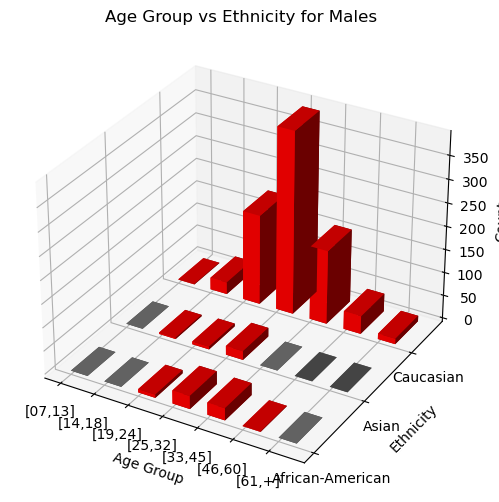

In [13]:
# Plotting for males
fig_male = plt.figure(figsize=(10, 6))
ax_male = fig_male.add_subplot(111, projection='3d')

xpos_male, ypos_male = np.meshgrid(range(len(male_age_ethnicity_count.index)), range(len(male_age_ethnicity_count.columns)), indexing="ij")

xpos_male = xpos_male.ravel()
ypos_male = ypos_male.ravel()
zpos_male = 0

dx_male = dy_male = 0.5
dz_male = male_age_ethnicity_count.values.ravel()

# Filter out zero values
nonzero_indices_male = dz_male != 0
zero_indices_male = dz_male == 0
xpos_nonzero_male = xpos_male[nonzero_indices_male]
ypos_nonzero_male = ypos_male[nonzero_indices_male]
dz_nonzero_male = dz_male[nonzero_indices_male]
xpos_zero_male = xpos_male[zero_indices_male]
ypos_zero_male = ypos_male[zero_indices_male]
dz_zero_male = dz_male[zero_indices_male]

# Plot bars for non-zero counts
ax_male.bar3d(xpos_nonzero_male, ypos_nonzero_male, zpos_male, dx_male, dy_male, dz_nonzero_male, color='r', zsort='average')

# Plot bars for zero counts with a different color
ax_male.bar3d(xpos_zero_male, ypos_zero_male, zpos_male, dx_male, dy_male, dz_zero_male, color='grey', zsort='average')

# Setting labels and title for males
ax_male.set_xticks(range(len(male_age_ethnicity_count.index)))
ax_male.set_xticklabels(male_age_ethnicity_count.index)
ax_male.set_xlabel('Age Group')

ax_male.set_yticks(range(len(male_age_ethnicity_count.columns)))
ax_male.set_yticklabels(male_age_ethnicity_count.columns)
ax_male.set_ylabel('Ethnicity')

ax_male.set_zlabel('Count')
ax_male.set_title('Age Group vs Ethnicity for Males')

plt.show()


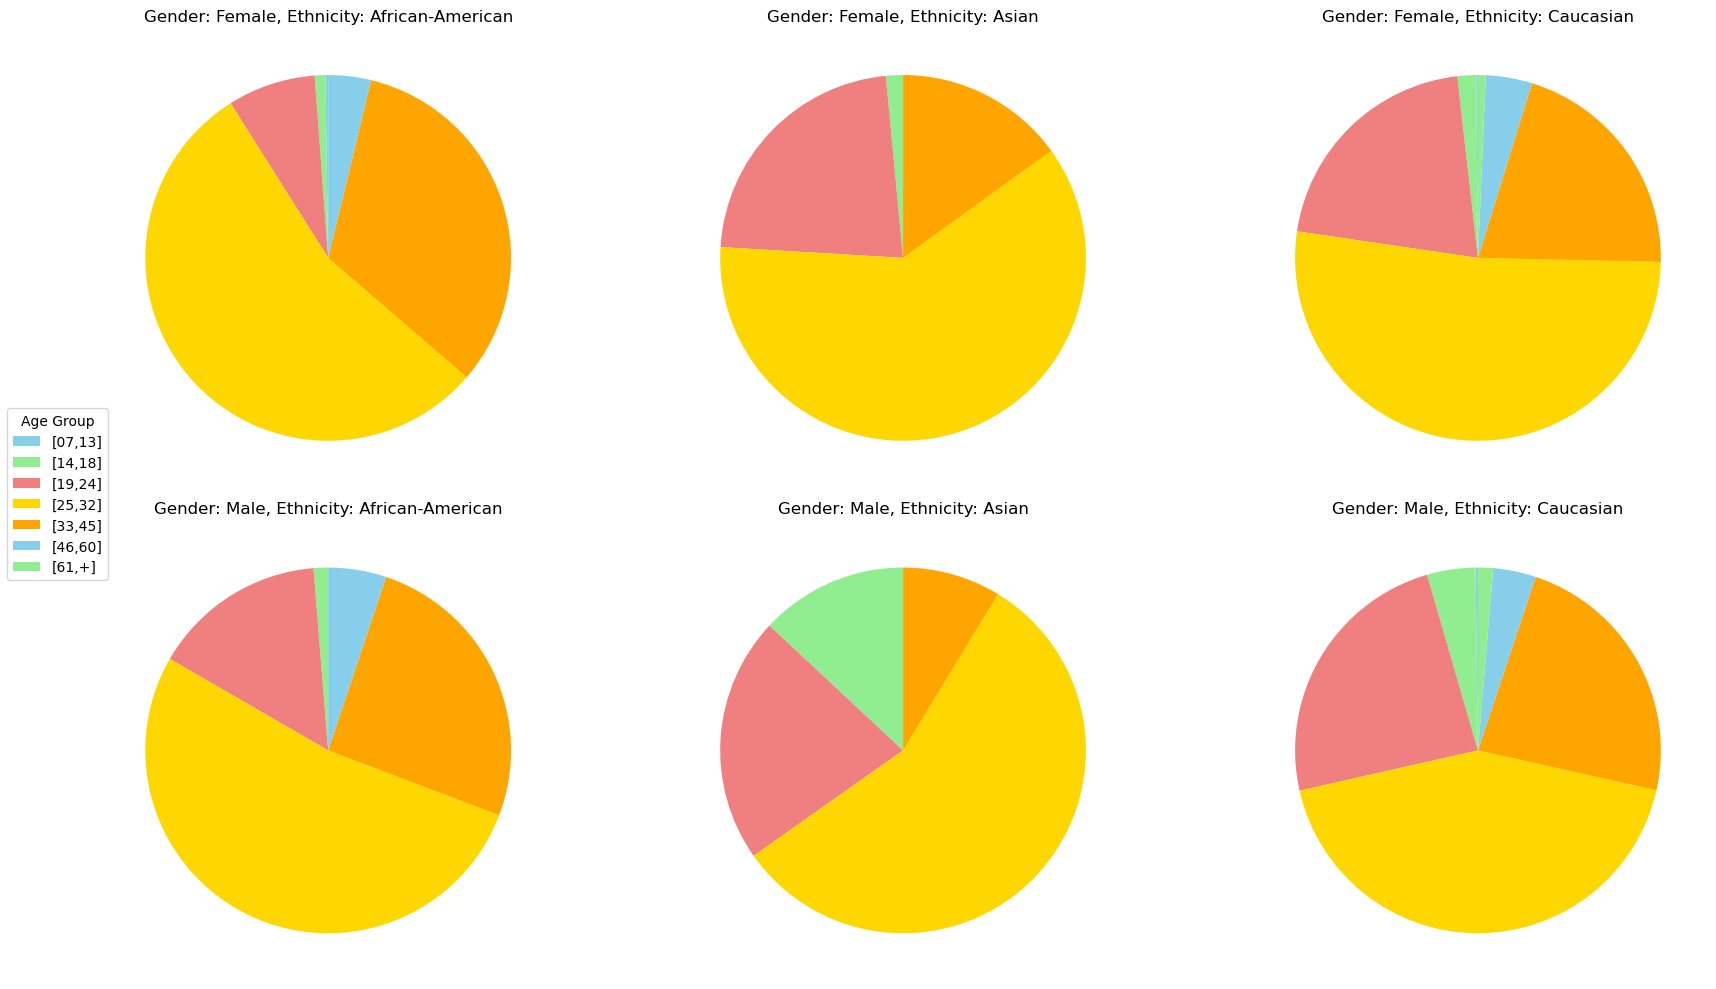

In [58]:
# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Get unique age groups
unique_age_groups = age_distribution.columns

for (gender, ethnicity), ax in zip(age_distribution.index, axes.flat):
    counts = age_distribution.loc[gender, ethnicity]
    wedges, _ = ax.pie(counts, labels=None, startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'orange'])
    ax.set_title(f'Gender: {gender}, Ethnicity: {ethnicity}')

# Add a legend for age groups
fig.legend(wedges, unique_age_groups, title='Age Group', loc='center left')

plt.tight_layout()
plt.show()


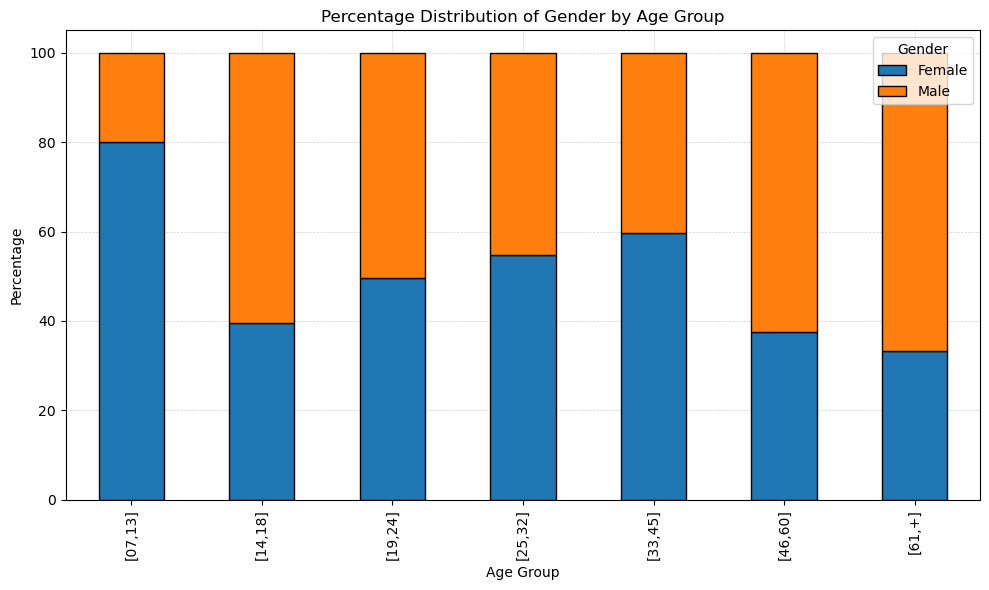

In [10]:
# Calculate the percentage distribution of gender within each age group
percentage_ethnicity_counts = ethnicity_counts.div(ethnicity_counts.sum(axis=1), axis=0) * 100

# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

# Create stacked bar plot for Gender
percentage_ethnicity_counts.plot(kind='bar', stacked=True, ax=ax1, edgecolor='black', zorder=3)
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Percentage')
ax1.set_title('Percentage Distribution of Gender by Age Group')
ax1.legend(title='Gender')

ax1.grid(color='lightgray', linestyle='--', linewidth=0.5, zorder=0)

plt.tight_layout()
plt.show()


In [5]:
df=test

Gender    Female  Male
AgeGroup              
[07,13]        4     1
[14,18]       19    29
[19,24]      203   207
[25,32]      532   440
[33,45]      273   185
[46,60]       24    40
[61,+]         6    12


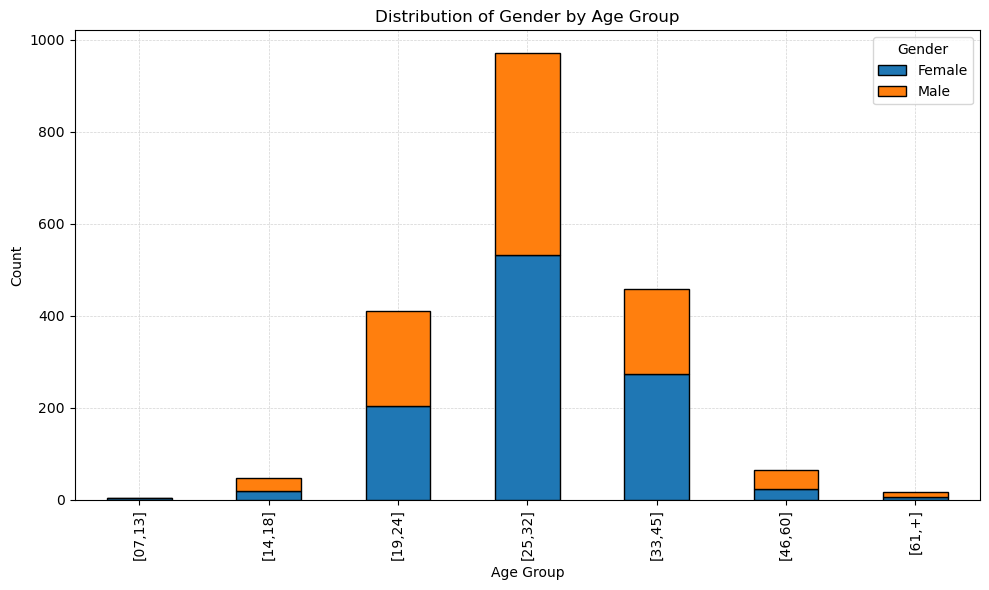

In [9]:
# Create a figure with two subplots
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))

# Count the occurrences of each Ethnicity within each Age Group
ethnicity_counts = df.groupby('AgeGroup')['Gender'].value_counts().unstack().fillna(0)
print(ethnicity_counts)

# Create stacked bar plot for Ethnicity
ethnicity_counts.plot(kind='bar', stacked=True, ax=ax1, edgecolor='black', zorder=3)
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Gender by Age Group')
ax1.legend(title='Gender')

ax1.grid(color='lightgray', linestyle='--', linewidth=0.5, zorder=0)

plt.tight_layout()
plt.show()


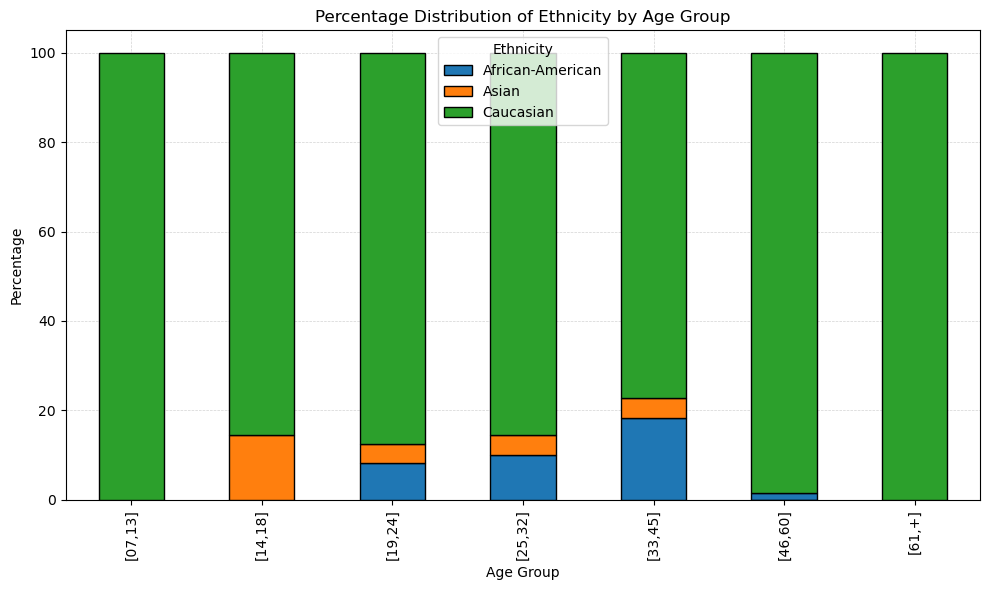

In [12]:
# Calculate the percentage distribution of ethnicity within each age group
percentage_ethnicity_counts = (ethnicity_counts.div(ethnicity_counts.sum(axis=1), axis=0) * 100).round(2)

# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

# Create stacked bar plot for Ethnicity
percentage_ethnicity_counts.plot(kind='bar', stacked=True, ax=ax1, edgecolor='black', zorder=3)
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Percentage')
ax1.set_title('Percentage Distribution of Ethnicity by Age Group')
ax1.legend(title='Ethnicity')

ax1.grid(color='lightgray', linestyle='--', linewidth=0.5, zorder=0)

plt.tight_layout()
plt.show()


Ethnicity  African-American  Asian  Caucasian
AgeGroup                                     
[07,13]                 0.0    0.0        5.0
[14,18]                 0.0    7.0       41.0
[19,24]                34.0   17.0      359.0
[25,32]                97.0   45.0      830.0
[33,45]                84.0   20.0      354.0
[46,60]                 1.0    0.0       63.0
[61,+]                  0.0    0.0       18.0


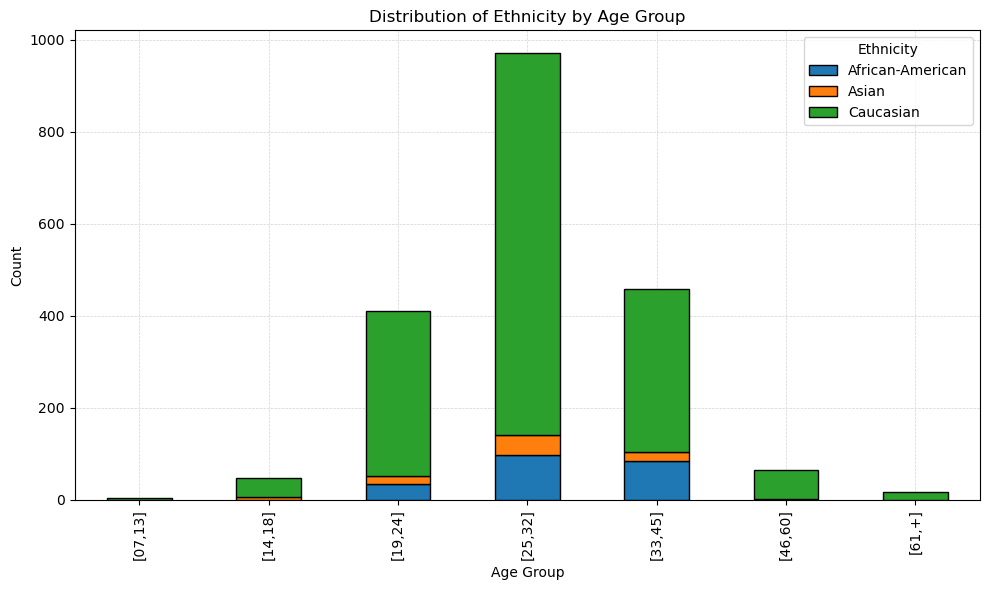

In [11]:
# Create a figure with two subplots
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))

# Count the occurrences of each Ethnicity within each Age Group
ethnicity_counts = df.groupby('AgeGroup')['Ethnicity'].value_counts().unstack().fillna(0)
print(ethnicity_counts)

# Create stacked bar plot for Ethnicity
ethnicity_counts.plot(kind='bar', stacked=True, ax=ax1, edgecolor='black', zorder=3)
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Ethnicity by Age Group')
ax1.legend(title='Ethnicity')

ax1.grid(color='lightgray', linestyle='--', linewidth=0.5, zorder=0)

plt.tight_layout()
plt.show()
